# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Amanda Riyas Utami]
- **Email:** [amandariyas12@gmail.com]
- **ID Dicoding:** [MC223D5X0901]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda berdasarkan kondisi cuaca, weekday, workingday, holiday, dan season?
- Bagaimana pengaruh dari atempt, hum, windspeed terhadap banyaknya penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
MNDday_df = pd.read_csv("https://raw.githubusercontent.com/AmandaRiyas/Bike-Sharing-Dataset/refs/heads/main/data/day.csv", sep=",")
MNDday_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- MNDday_df merupakan dataset penyewaan sepeda setiap harinya. Data ini memiliki 16 kolom yang terdiri dari instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, tempt, attemp, hum, windspeed, casual, registered, dan cnt.
- Pada bagian kolom season kategori dari setiap data yaitu (1:Spring , 2:Summer, 3:Fall, 4:winter)
- Pada bagian kolom holiday kaetegori dari setiap data yaitu (0: Tidak, 1: Ya)
- Pada bagian kolom weekday kategori dari setiap data yaitu (0:Minggu 1:Senin, 2: Selasa, 3:Rabu, 4:Kamis, 5:Jumat, 6: Sabtu)
- Pada bagian kolom workingday kategori dari setiap data yaitu (0:Tidak, 2: Ya)
- Pada bagian kolom weathersit kategori dari setiap data yaitu (1:Cerah, 2:Berawan, 3: Hujan/Salju Ringan)

### Assessing Data

#### Menilai tabel `MNDday_df`

In [3]:
MNDday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
MNDday_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", MNDday_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
MNDday_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dari data "MNDday_df" setelah di cek tidak ada missing value, duplicate data, maupun innacurate value
- Data "MNDday_df" terdapat kesalahan pada tipe data bagian dteday yang harusnya bertipe datetime dan (season, yr, mnth, holiday, weekday, workingday, dan weathersit) yang harusnya category.

### Cleaning Data

#### Cleaning tabel `MNDday_df`

In [7]:
# Mengganti tipe data dteday dari object menjadi datetimes
datetime_columns = ["dteday"]

for column in datetime_columns:
  MNDday_df[column] = pd.to_datetime(MNDday_df[column])
MNDday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
# Mengganti tipe data season, yr, mnth, holiday, weekday, workingday, dan weathersit dari yang bertipe int menjadi category
category_columns = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

for column in category_columns:
  MNDday_df[column] = MNDday_df[column].astype("category")
MNDday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [9]:
MNDday_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada data MNDday_df kita telah melakukan penggantian tipe data pada kolom dteday yang awalnya object kemudian dirubah menjadi datetimes
- Kita juga telah mengganti tipe data pada kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit yang awalnya int64 dirubah menjadi category

## Exploratory Data Analysis (EDA)

### Explore `MNDday`

In [10]:
MNDday_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
615,616,2012-09-07,3,1,9,0,5,1,1,0.703333,0.657204,0.736250,0.171646,1045,6459,7504
649,650,2012-10-11,4,1,10,0,4,1,1,0.435000,0.431167,0.463333,0.181596,834,6736,7570
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272
158,159,2011-06-08,2,0,6,0,3,1,1,0.775833,0.727279,0.622083,0.136817,676,3725,4401
417,418,2012-02-22,1,1,2,0,3,1,1,0.395833,0.392667,0.567917,0.234471,394,4379,4773


In [11]:
MNDday_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
MNDday_df.instant.is_unique

True

### Pertanyaan 1:
Bagaimana pola penyewa sepeda berdasarkan kondisi cuaca, weekday, workingday, holiday, dan season?

#### Berdasarkan cuaca

In [13]:
weather_mapping = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan/Salju ringan' 
}
MNDday_df['cuaca'] = MNDday_df['weathersit'].map(weather_mapping)
summary_cuaca = MNDday_df.groupby('cuaca')['cnt'].agg(["min", "max", "mean", "sum"])
print(summary_cuaca)

                    min   max         mean      sum
cuaca                                              
Cerah               431  8714  4876.786177  2257952
Berawan             605  8362  4035.862348   996858
Hujan/Salju ringan   22  4639  1803.285714    37869


C:\Users\User\AppData\Local\Temp\ipykernel_10312\2876266081.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_cuaca = MNDday_df.groupby('cuaca')['cnt'].agg(["min", "max", "mean", "sum"])


* Minimum penyewa sepeda paling rendah terjadi ketika cuaca hujan/salju ringan
* Maksimum penyewa sepeda ketika cuaca cerah
* Rata-rata penyewa sepeda tertinggi ketika cuaca cerah dan rata-rata penyewa sepeda terendah ketika cuaca hujan/salju ringan
* Jumlah penyewa sepeda teringgi ketika cuaca cerah dan jumlah penyewa sepeda terendah ketika cuaca hujan/salju ringan

#### Berdasarkan weekday

In [14]:
weekday_mapping = { 
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}
MNDday_df['weekday_label'] = MNDday_df['weekday'].map(weekday_mapping)
summary_weekday = MNDday_df.groupby('weekday_label')['cnt'].agg(["min", "max", "mean", "sum"])
print(summary_weekday)

                min   max         mean     sum
weekday_label                                 
Minggu          605  8227  4228.828571  444027
Senin            22  7525  4338.123810  455503
Selasa          683  7767  4510.663462  469109
Rabu            441  8173  4548.538462  473048
Kamis           431  7804  4667.259615  485395
Jumat          1167  8362  4690.288462  487790
Sabtu           627  8714  4550.542857  477807


C:\Users\User\AppData\Local\Temp\ipykernel_10312\978296533.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_weekday = MNDday_df.groupby('weekday_label')['cnt'].agg(["min", "max", "mean", "sum"])


* Nilai minimum penyewa sepeda terjadi pada hari Senin
* Nilai maksimum penyewa sepeda terjadi pada hari Sabtu
* Rata-Rata penyewa sepeda tertinggi pada hari Jumat dan rata-rata terendah pada hari Minggu
* Jumlah tertinggi penyewa sepeda pada hari Jumat dan jumlah terendah pada hari Minggu

#### Berdasarkan workingday

In [15]:
workingday_mapping = { 
    0: 'Tidak',
    1: 'Ya'
}
MNDday_df['workingday_label'] = MNDday_df['workingday'].map(workingday_mapping)
summary_workingday = MNDday_df.groupby('workingday_label')['cnt'].agg(["min", "max", "mean", "sum"])
print(summary_workingday)

                  min   max         mean      sum
workingday_label                                 
Tidak             605  8714  4330.168831  1000269
Ya                 22  8362  4584.820000  2292410


C:\Users\User\AppData\Local\Temp\ipykernel_10312\2375517520.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_workingday = MNDday_df.groupby('workingday_label')['cnt'].agg(["min", "max", "mean", "sum"])


* Nilai minimum penyewa sepeda terjadi ketika workingday
* Nilai maksimum penyewa sepeda terjadi ketika bukan workingday
* Rata-rata penyewa sepeda tertinggi terjadi ketika workingday
* Jumlah penyewa sepeda tertinggi terjadi ketika workingday

#### Berdasarkan holiday

In [16]:
holiday_mapping = { 
    0: 'Tidak',
    1: 'Ya'
}
MNDday_df['holiday_label'] = MNDday_df['holiday'].map(holiday_mapping)
summary_holiday = MNDday_df.groupby('holiday_label')['cnt'].agg(["min", "max", "mean", "sum"])
print(summary_holiday)

                min   max         mean      sum
holiday_label                                  
Tidak            22  8714  4527.104225  3214244
Ya             1000  7403  3735.000000    78435


C:\Users\User\AppData\Local\Temp\ipykernel_10312\4010795420.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_holiday = MNDday_df.groupby('holiday_label')['cnt'].agg(["min", "max", "mean", "sum"])


* Nilai minimum sepeda yang disewa terjadi ketika bukan holiday
* Nilai maksimum sepeda yang disewa terjadi ketika bukan holiday
* Rata-rata tertinggi sepeda yang disewa terjadi ketika bukan holiday
* Jumlah sepeda yang disewa tertinggi terjadi ketika bukan holiday

#### Berdasarkan Musim

In [17]:
season_mapping = { 
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
MNDday_df['season_label'] = MNDday_df['season'].map(season_mapping)
summary_season = MNDday_df.groupby('season_label')['cnt'].agg(["min", "max", "mean", "sum"])
print(summary_season)

               min   max         mean      sum
season_label                                  
Spring         431  7836  2604.132597   471348
Summer         795  8362  4992.331522   918589
Fall          1115  8714  5644.303191  1061129
Winter          22  8555  4728.162921   841613


C:\Users\User\AppData\Local\Temp\ipykernel_10312\3795089065.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_season = MNDday_df.groupby('season_label')['cnt'].agg(["min", "max", "mean", "sum"])


* Nilai minimum sepeda yang disewa terjadi ketika musim winter
* Nilai maksimum sepeda yang disewa terjadi ketika musim Fall
* Rata-rata tertinggi sepeda yang disewa terjadi ketika musim Fall dan rata-rata terendah ketika musim Spring
* Jumlah tertinggi sepeda yang disewa terjadi ketika musim Fall dan jumlah terendah ketika musim Spring

### Pertanyaan 2:
Bagaimana pengaruh dari atempt, hum, windspeed terhadap banyaknya penyewa sepeda?

In [18]:
hubungan = MNDday_df[['atemp', 'hum', 'windspeed', 'cnt']]
correlation_matrix = hubungan.corr()
print(correlation_matrix)

              atemp       hum  windspeed       cnt
atemp      1.000000  0.139988  -0.183643  0.631066
hum        0.139988  1.000000  -0.248489 -0.100659
windspeed -0.183643 -0.248489   1.000000 -0.234545
cnt        0.631066 -0.100659  -0.234545  1.000000


Dari matriks korelasi di atas diperoleh:
* Korelasi antara atemp (suhu terasa) dengan cnt (jumlah) memiliki korelasi kuat, artinya ketika suhu terasa naik maka jumlah penyewa sepeda juga akan naik
* Korelasi antara hum (kelembaban) dengan cnt (jumlah) memiliki korelasi sangat rendah, artinya kelembaban tidak memiliki pengaruh terhadap jumlah penyewa sepeda
* Korelasi antara windspeed (kecepatan angin) dengan cnt (jumlah) memiliki korelasi negatif tapi rendah, artinya windspeed hanya memiliki pengaruh yang kecil terhadap jumlah penyewa sepeda, apabila windspeed naik maka penyewa sepeda akan sedikit berkurang

In [19]:
MNDday_df['atemp_actual'] = MNDday_df['atemp'] * 50
average_atemp = MNDday_df['atemp_actual'].mean()
tolerance = 2
print(f"Rata-rata suhu terasa: {average_atemp:.2f}°C")
def label_temp(row):
    if row['atemp_actual'] < (average_atemp - tolerance):
        return 'Di Bawah Rata-rata'
    elif (average_atemp - tolerance) <= row['atemp_actual'] <= (average_atemp + tolerance):
        return 'Normal'
    else:
        return 'Di Atas Rata-rata'
MNDday_df['atemp_label'] = MNDday_df.apply(label_temp, axis=1)
print("\nContoh data suhu setelah konversi dan pelabelan:")
print(MNDday_df[['atemp', 'atemp_actual', 'atemp_label']].head(10))
summary_atemp = MNDday_df.groupby('atemp_label')['cnt'].agg(["min", "max", "mean", "sum"]).sort_values('mean', ascending=False)
print("\nRingkasan Penyewaan Berdasarkan Suhu:")
print(summary_atemp)

Rata-rata suhu terasa: 23.72°C

Contoh data suhu setelah konversi dan pelabelan:
      atemp  atemp_actual         atemp_label
0  0.363625      18.18125  Di Bawah Rata-rata
1  0.353739      17.68695  Di Bawah Rata-rata
2  0.189405       9.47025  Di Bawah Rata-rata
3  0.212122      10.60610  Di Bawah Rata-rata
4  0.229270      11.46350  Di Bawah Rata-rata
5  0.233209      11.66045  Di Bawah Rata-rata
6  0.208839      10.44195  Di Bawah Rata-rata
7  0.162254       8.11270  Di Bawah Rata-rata
8  0.116175       5.80875  Di Bawah Rata-rata
9  0.150888       7.54440  Di Bawah Rata-rata

Ringkasan Penyewaan Berdasarkan Suhu:
                     min   max         mean      sum
atemp_label                                         
Di Atas Rata-rata   1115  8714  5662.571429  1902624
Normal                22  8090  4891.816092   425588
Di Bawah Rata-rata   431  7570  3131.386364   964467


* Ketika suhu di atas rata-rata nilai minimum penyewa sepeda adalah 1115, nilai maksimumnya 8714, dengan rata rata 5662,57 dan jumlahnya 1902624
* Ketika suhu normal  nilai minimum penyewa sepeda adalah 22, nilai maksimumnya 8090, dengan rata rata 4891,816 dan jumlahnya 425588
* Ketika suhu di bawah rata-rata nilai minimum penyewa sepeda adalah 431, nilai maksimumnya 7570, dengan rata rata 3131,386 dan jumlahnya 964467

**Insight:**
- Pola penyewa sepeda tertinggi terjadi pada saat working day juga tidak sedang holiday terutama pada hari Jumat ketika cuaca cerah di musim gugur (Fall). Dan penyewa sepeda terendah terjadi ketika bukan working day juga holiday terutama pada hari Minggu ketika cuaca sedang hujan/salju ringan di musim semi (Spring)
- Atempt memiliki pengaruh yang cukup kuat dengan banyaknya penyewa sepeda, ketika atempt naik maka penyewa sepeda juga naik. Ketika atempt di atas rata-rata penyewa sepeda malah lebih banyak. Windspeed hanya memiliki pengaruh yang sangat kecil terhadap banyaknya penyewa sepeda, namun dalam pengaruh kecil negatif, jadi ketika windspeed naik maka akan sedikit menurunkan penyewa sepeda, sedangkan hum tidak memiliki pengaruh terhadap banyaknya penyewa sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pola penyewa sepeda berdasarkan kondisi cuaca, weekday, workingday, holiday, dan season?

In [20]:
MNDday_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,cuaca,weekday_label,workingday_label,holiday_label,season_label,atemp_actual,atemp_label
41,42,2011-02-11,1,0,2,0,5,1,1,0.189091,...,149,1597,1746,Cerah,Jumat,Ya,Tidak,Spring,10.67545,Di Bawah Rata-rata
116,117,2011-04-27,2,0,4,0,3,1,2,0.620000,...,547,3325,3872,Berawan,Rabu,Ya,Tidak,Summer,28.75710,Di Atas Rata-rata
379,380,2012-01-15,1,1,1,0,0,0,1,0.166667,...,284,2027,2311,Cerah,Minggu,Tidak,Tidak,Spring,8.08125,Di Bawah Rata-rata
332,333,2011-11-29,4,0,11,0,2,1,2,0.458333,...,96,2818,2914,Berawan,Selasa,Ya,Tidak,Winter,22.56875,Normal
27,28,2011-01-28,1,0,1,0,5,1,2,0.203478,...,38,1129,1167,Berawan,Jumat,Ya,Tidak,Spring,11.16585,Di Bawah Rata-rata


In [21]:
MNDday_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,cuaca,weekday_label,workingday_label,holiday_label,season_label,atemp_actual,atemp_label
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,331,654,985,Berawan,Sabtu,Tidak,Tidak,Spring,18.18125,Di Bawah Rata-rata
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,131,670,801,Berawan,Minggu,Tidak,Tidak,Spring,17.68695,Di Bawah Rata-rata
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,120,1229,1349,Cerah,Senin,Ya,Tidak,Spring,9.47025,Di Bawah Rata-rata
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,108,1454,1562,Cerah,Selasa,Ya,Tidak,Spring,10.60610,Di Bawah Rata-rata
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,82,1518,1600,Cerah,Rabu,Ya,Tidak,Spring,11.46350,Di Bawah Rata-rata


In [23]:
from scipy import stats
MNDday_df['dteday'] = pd.to_datetime(MNDday_df['dteday'])
monthly_rentals_df = MNDday_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum",
    "weathersit": lambda x: stats.mode(x, keepdims=True)[0][0],
    "weekday": lambda x: stats.mode(x, keepdims=True)[0][0],
    "workingday": lambda x: stats.mode(x, keepdims=True)[0][0],
    "holiday": lambda x: stats.mode(x, keepdims=True)[0][0],
    "season": lambda x: stats.mode(x, keepdims=True)[0][0]
})
monthly_rentals_df.index = monthly_rentals_df.index.strftime('%Y-%m')
monthly_rentals_df = monthly_rentals_df.reset_index()
monthly_rentals_df.rename(columns={
    "dteday": "month",
    "cnt": "total_rentals"
}, inplace=True)
print(monthly_rentals_df.head())


C:\Users\User\AppData\Local\Temp\ipykernel_10312\3776457815.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rentals_df = MNDday_df.resample(rule='M', on='dteday').agg({


     month  total_rentals weathersit weekday workingday holiday season
0  2011-01          38189          1       0          1       0      1
1  2011-02          48215          1       0          1       0      1
2  2011-03          64045          1       2          1       0      1
3  2011-04          94870          2       5          1       0      2
4  2011-05         135821          1       0          1       0      2


C:\Users\User\AppData\Local\Temp\ipykernel_10312\3057202937.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = monthly_rentals_df.groupby(var)["total_rentals"].sum().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_10312\3057202937.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = monthly_rentals_df.groupby(var)["total_rentals"].sum().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_10312\3057202937.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current be

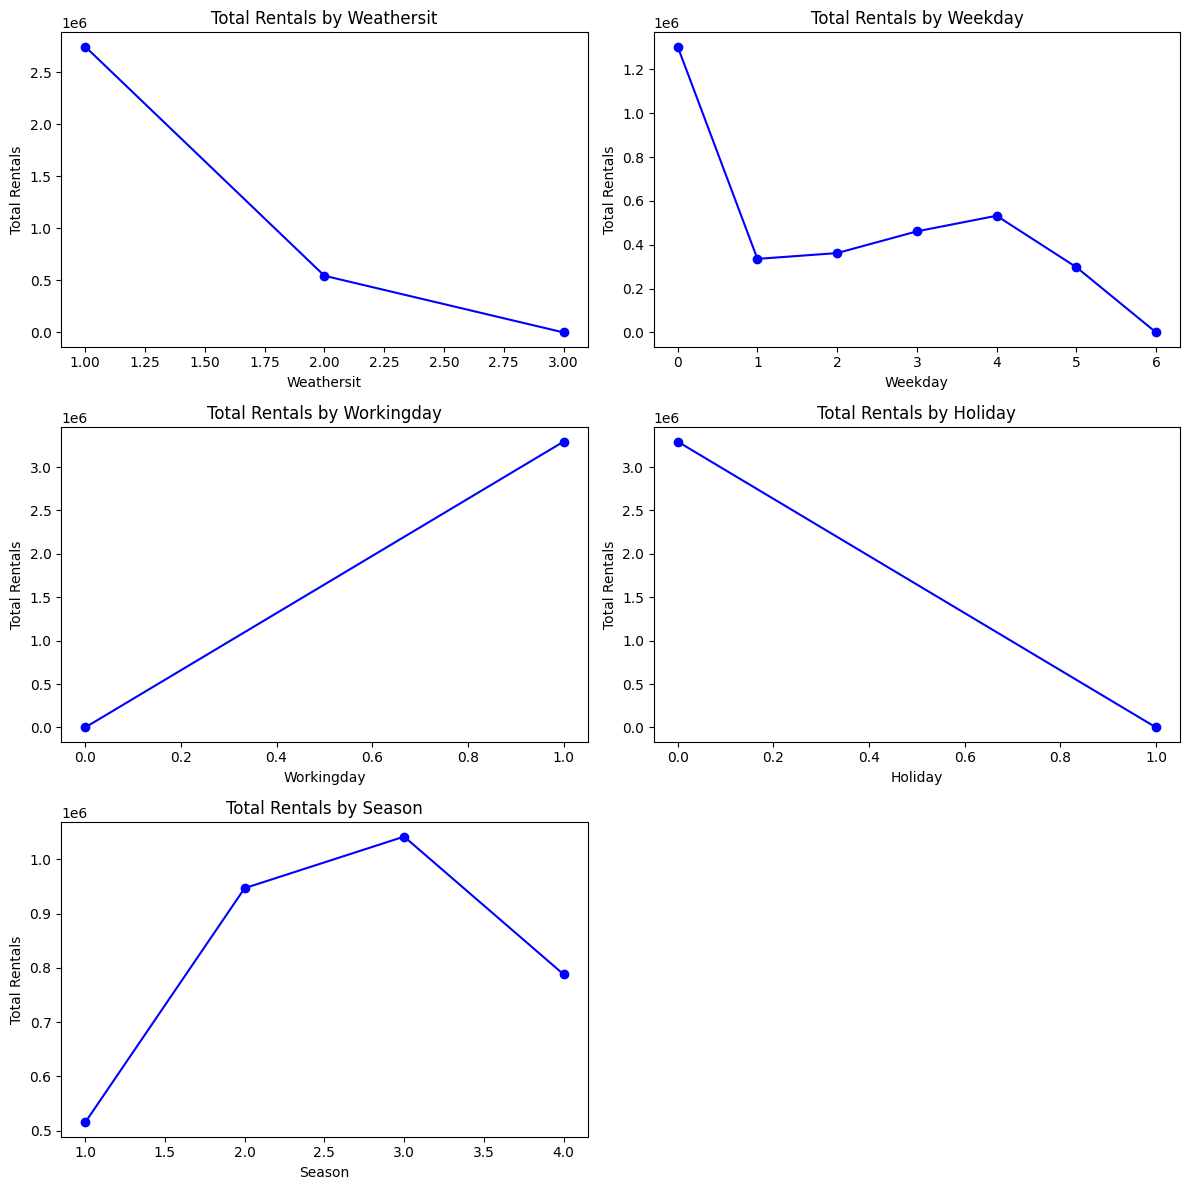

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
categorical_vars = ["weathersit", "weekday", "workingday", "holiday", "season"]
for i, var in enumerate(categorical_vars):
    grouped_data = monthly_rentals_df.groupby(var)["total_rentals"].sum().reset_index()
    axes[i].plot(grouped_data[var], grouped_data["total_rentals"], marker='o', linestyle='-', color='b')
    axes[i].set_title(f"Total Rentals by {var.capitalize()}")
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel("Total Rentals")
if len(categorical_vars) % 2 != 0:
    fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


### Pertanyaan 2:
Bagaimana pengaruh dari atempt, hum, windspeed terhadap banyaknya penyewa sepeda?

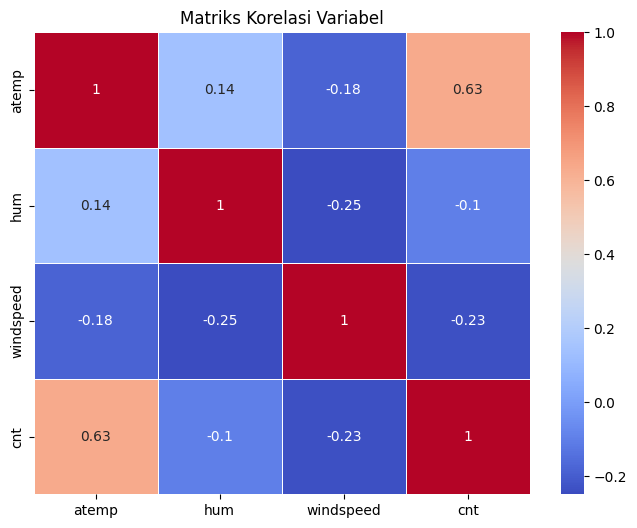

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi Variabel")
plt.show()

Dari matriks korelasi di atas diperoleh:
* Korelasi antara atemp (suhu terasa) dengan cnt (jumlah) memiliki korelasi kuat, artinya ketika suhu terasa naik maka jumlah penyewa sepeda juga akan naik
* Korelasi antara hum (kelembaban) dengan cnt (jumlah) memiliki korelasi sangat rendah, artinya kelembaban tidak memiliki pengaruh terhadap jumlah penyewa sepeda
* Korelasi antara windspeed (kecepatan angin) dengan cnt (jumlah) memiliki korelasi negatif tapi korelasinya rendah, artinya windspeed hanya memiliki pengaruh yang kecil terhadap jumlah penyewa sepeda, apabila windspeed naik maka akan menurunkan sedikit cnt(jumlah)

#### Penyewaan Berdasarkan Tingkat Suhu

C:\Users\User\AppData\Local\Temp\ipykernel_10312\1232636631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_atemp.reset_index(), x='atemp_label', y='mean', palette='coolwarm')


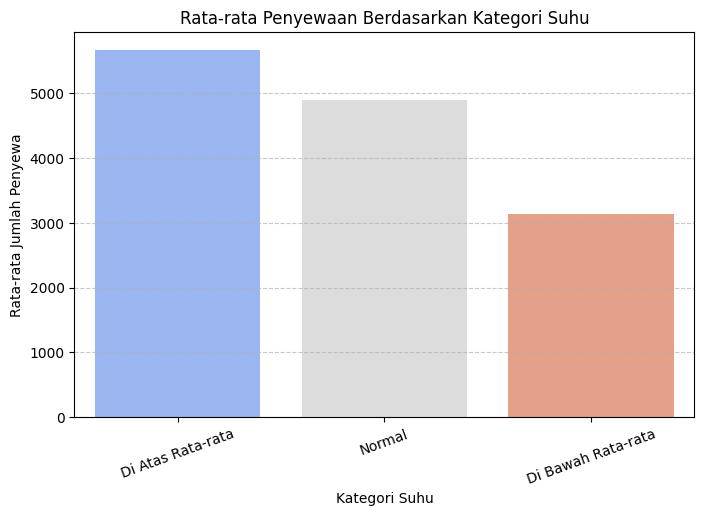

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(data=summary_atemp.reset_index(), x='atemp_label', y='mean', palette='coolwarm')
plt.title("Rata-rata Penyewaan Berdasarkan Kategori Suhu")
plt.xlabel("Kategori Suhu")
plt.ylabel("Rata-rata Jumlah Penyewa")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

* Ketika suhu di atas rata-rata penyewa sepeda akan lebih banyak
* Ketika suhu di bawah rata-rata penyewa sepeda akan menurun

**Insight:**
- Rata-rata tertinggi penyewa sepeda terjadi ketika workingday terutama hari Jumat ketika sedang tidak holiday dengan cuaca cerah di musim gugur (Fall) dan rata rata penyewa sepeda terendah terjadi ketika  bukan workingday terutama pada hari Minggu dan holiday ketika cuaca hujan/salju di musim panas (spring) 
- korelasi suhu terasa (atempt) dengan jumlah penyewa sepeda (cnt) memiliki korelasi yang sangat kuat sehingga ketika atempt naik maka jumlah penyewa sepeda akan ikut naik terutama ketika suhu di atas rata-rata, korelasi windspeed hanya memiliki korelasi rendah dan negatif sehingga ketika windspeed naik maka penyewa sepeda akan sedikit turun, dan kelembaban (hum) tidak memiliki korelasi dengan jumlah penyewa sepeda.

## Analisis Lanjutan (Analisis Clustering)

In [30]:
MNDday_df['suhu_kategori'] = pd.cut(MNDday_df['atemp'], bins=[0, 0.3, 0.6, 1], labels=['Dingin', 'Sedang', 'Panas'])
MNDday_df['kelembaban_kategori'] = pd.cut(MNDday_df['hum'], bins=[0, 0.4, 0.7, 1], labels=['Rendah', 'Sedang', 'Tinggi'])
MNDday_df['angin_kategori'] = pd.cut(MNDday_df['windspeed'], bins=[0, 0.2, 0.4, 1], labels=['Pelan', 'Sedang', 'Kencang'])

# Gabung kategori ke satu kolom cluster
MNDday_df['cluster_manual'] = MNDday_df['season'].astype(str) + "_" + MNDday_df['weathersit'].astype(str) + "_" + \
                               MNDday_df['weekday'].astype(str) + "_" + MNDday_df['workingday'].astype(str) + "_" + \
                               MNDday_df['holiday'].astype(str) + "_" + MNDday_df['suhu_kategori'].astype(str) + "_" + \
                               MNDday_df['kelembaban_kategori'].astype(str) + "_" + MNDday_df['angin_kategori'].astype(str)

# Buat ringkasan cluster
summary_cluster = MNDday_df.groupby('cluster_manual')['cnt'].agg(['mean', 'sum', 'count']).sort_values('count', ascending=False)

# Ubah ke format tabel lebih rapi
print("\nRingkasan Cluster Manual:")
from tabulate import tabulate
print(tabulate(summary_cluster.reset_index(), headers='keys', tablefmt='pretty'))



Ringkasan Cluster Manual:
+-----+---------------------------------+--------------------+-------+-------+
|     |         cluster_manual          |        mean        |  sum  | count |
+-----+---------------------------------+--------------------+-------+-------+
|  0  |  3_1_4_1_0_Panas_Sedang_Pelan   | 6339.733333333334  | 95096 |  15   |
|  1  |  3_1_3_1_0_Panas_Sedang_Pelan   | 6223.666666666667  | 74684 |  12   |
|  2  |  3_1_5_1_0_Panas_Sedang_Pelan   |       5428.9       | 54289 |  10   |
|  3  |  3_1_2_1_0_Panas_Sedang_Pelan   |       5862.7       | 58627 |  10   |
|  4  |  3_1_6_0_0_Panas_Sedang_Pelan   |       5594.1       | 55941 |  10   |
|  5  |  4_1_6_0_0_Sedang_Sedang_Pelan  | 5258.555555555556  | 47327 |   9   |
|  6  |  3_1_1_1_0_Panas_Sedang_Pelan   | 5772.222222222223  | 51950 |   9   |
|  7  |  3_1_0_0_0_Panas_Sedang_Pelan   | 5369.888888888889  | 48329 |   9   |
|  8  |  2_1_6_0_0_Sedang_Sedang_Pelan  |      6858.25       | 54866 |   8   |
|  9  |  4_1_5_1_0_Sedang

**Insight:**
- Penyewa sepeda tertinggi terjadi ketika cuaca cerah dengan, suhunya panas, workingday, bukan holiday dan musim gugur. Kelembaban dan angin tidak terlalu berpengaruh.
- Penyewa sepeda terendah terjadi ketika cuaca hujan/salju, suhunya dingin, weekend, holiday, dan musim semi

## Conclusion

- **Conclution pertanyaan 1**
Dari seluruh proses analisis data yang telah dilakukan kita dapat disimpulkan bahwa penyewa sepeda tertinggi terjadi ketika workingday (tidak dalam masa holiday) terutama pada hari Jumat ketika cuaca cerah di musim gugur(Fall). Penyewaan sepeda terendah terjadi ketika bukan workingday (holiday) terutama hari Minggu ketika cuaca hujan/salju ringan di musim gugur (Fall) 
- **Conclution pertanyaan 2**
Dari seluruh proses analisis data yang telah dilakukan kita dapat disiimpulkan bahwa atemp memiliki pengaruh yang kuat terhadap jumlah penyewa sepeda, semakin tinggi atempt maka semakin tinggi pula jumlah penyewa sepeda, windspeed hanya memiliki korelasi lemah dan negatif artinya setiap windspeed meningkat akan sedikit menurunkan jumlah penyewa sepeda, dan kelembaban (hum) tidak memiliki korelasi dengan jumlah penyewa sepeda.

In [31]:
MNDday_df.to_csv("MNDday_df.csv", index=False)

In [32]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
